In [27]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cross_validation import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.grid_search import GridSearchCV

In [28]:
def plot_confusion_matrix(cm):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title('Confusion Matrix')
    fig.colorbar(im)

    target_names = ['not survived', 'survived']

    tick_marks = np.arange(len(target_names))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(target_names, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(target_names)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fig.tight_layout()

In [29]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [30]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [31]:
def extract_feature(df):
    X = df[['Age', 'Pclass', 'Sex']]
    X['AgeFill'] = X['Age'].fillna(X['Age'].mean())
    X = X.drop(['Age'], axis=1)
    X['Gender'] = X['Sex'].map({'female': 0, 'male': 1}).astype(int)
    X['Pclass_Gender'] = X['Pclass'] + X['Gender']
    X = X.drop(['Pclass', 'Sex', 'Gender'], axis=1)
    return X

In [14]:
def calc_classifier(df):
    X_train = extract_feature(df)
    y_train = df['Survived']
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=0)
    print('Num of Training Samples: {}'.format(len(X_train)))
    print('Num of Validation Samples: {}'.format(len(X_val)))
    
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    print('Accuracy on Training Set: {:.3f}'.format(accuracy_score(y_train, y_train_pred)))
    print('Accuracy on Validation Set: {:.3f}'.format(accuracy_score(y_val, y_val_pred)))
    cm = confusion_matrix(y_val, y_val_pred)
    plot_confusion_matrix(cm)
    return clf

Num of Training Samples: 712
Num of Validation Samples: 179
Accuracy on Training Set: 0.768
Accuracy on Validation Set: 0.804


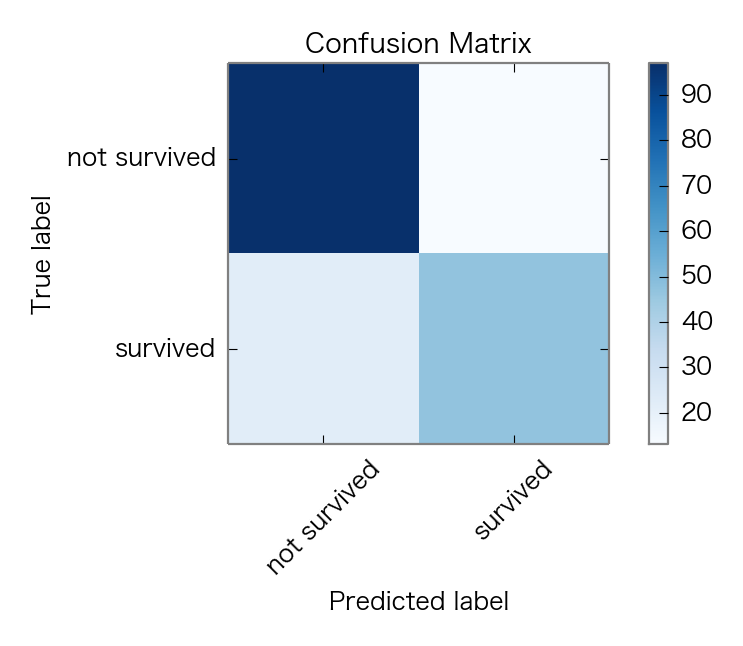

In [20]:
clf = calc_classifier(df_train)

In [21]:
def cross_val(clf, X, y, K, random_state=0):
    cv = KFold(len(y), K, shuffle=True, random_state=random_state)
    scores = cross_val_score(clf, X, y, cv=cv)
    return scores

In [24]:
X_train = extract_feature(df_train)
y_train = df_train.Survived
scores = cross_val(LogisticRegression(), X_train, y_train, 5)
print('Scores:', scores)
print('Mean Score: {0:.3f} (+/-{1:.3f})'.format(scores.mean(), scores.std()*2))

('Scores:', array([ 0.80446927,  0.74719101,  0.80337079,  0.74719101,  0.76966292]))
Mean Score: 0.774 (+/-0.051)


In [25]:
test_X = extract_feature(df_test)
train_X = extract_feature(df_train)
test_Y = clf.predict(train_X)